<a href="https://colab.research.google.com/github/yanrpi/bmed-4460-6460/blob/master/01_PythonBasics/03_numpy_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

(634, 800)
uint8
6
137
20.532529574132493


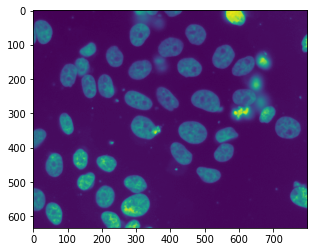

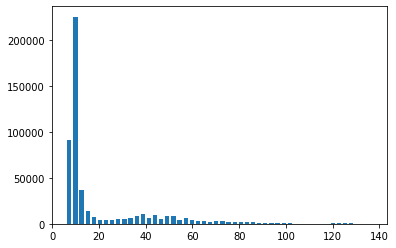

In [7]:
fName = "GFP_06-DAPI.tif"

I = imageio.imread(fName, format='tif')
print(I.shape)
print(I.dtype)
print(I.min())
print(I.max())
print(I.mean())

plt.imshow(I)
plt.show()      # show the window
hist, bins = np.histogram(I, bins=50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

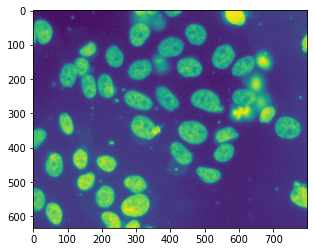

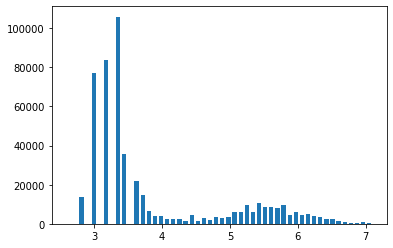

In [8]:
'''Map the intensity in the log2 '''
ILog = np.log2(I, dtype=np.float32)
plt.imshow(ILog)
plt.show()      # show the window
hist, bins = np.histogram(ILog, bins=50)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


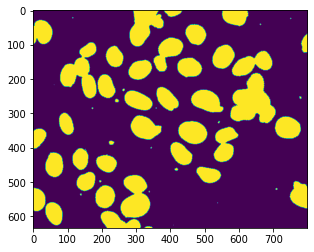

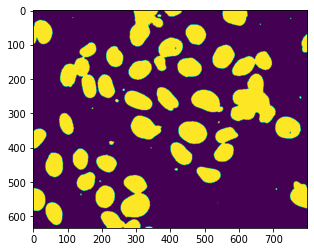

In [10]:
'''Global Threshold'''
idx = I > 20
plt.imshow(idx)
plt.show()


idx = ILog > 4.5
plt.imshow(idx)
plt.show()

In [11]:
'''Report Area and Intensity in Segmentation Mask'''
nPixels    = len(I[idx])
PercentArea =  100.0 * float(nPixels) / float(I.size) 
print("Number of Pixels in Mask: ", nPixels)         #131296
print("Percent Area: ",             PercentArea)     #25.88

print("Mean Intensity in Mask: ", I[idx].mean())     #50.782
print("Max Intensity in Mask: ",  I[idx].max())      #137
print("Min Intensity in Mask: ",  I[idx].min())      #21

Number of Pixels in Mask:  126978
Percent Area:  25.035094637223974
Mean Intensity in Mask:  51.77928460048197
Max Intensity in Mask:  137
Min Intensity in Mask:  23


Number of elements:  57


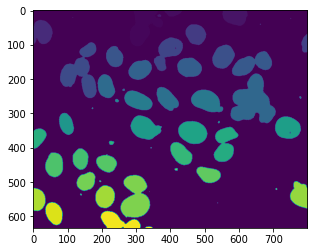

In [14]:
from scipy.ndimage import measurements
ILabel, nFeatures = measurements.label(idx)
print("Number of elements: ", nFeatures)
plt.imshow(ILabel)
plt.show()

In [16]:
'''Report Intensity Per Object'''
for k in range(nFeatures):
    idxCell = ILabel == k
    print("Cell: ", k, " Mean: ", I[idxCell].mean())

Cell:  0  Mean:  10.097440442688745
Cell:  1  Mean:  43.577513054830284
Cell:  2  Mean:  38.63136176066025
Cell:  3  Mean:  94.19956140350877
Cell:  4  Mean:  28.12857142857143
Cell:  5  Mean:  24.8
Cell:  6  Mean:  26.5
Cell:  7  Mean:  50.13081486106775
Cell:  8  Mean:  24.0
Cell:  9  Mean:  29.77777777777778
Cell:  10  Mean:  37.65494505494505
Cell:  11  Mean:  73.37654320987654
Cell:  12  Mean:  34.48080481036078
Cell:  13  Mean:  46.58397870280736
Cell:  14  Mean:  40.20749625187406
Cell:  15  Mean:  37.91850888599913
Cell:  16  Mean:  47.4027139874739
Cell:  17  Mean:  43.45706106870229
Cell:  18  Mean:  39.264857437306766
Cell:  19  Mean:  53.28459713557684
Cell:  20  Mean:  46.20007680491551
Cell:  21  Mean:  36.34934652066408
Cell:  22  Mean:  31.545454545454547
Cell:  23  Mean:  42.92940900562852
Cell:  24  Mean:  46.828641370869036
Cell:  25  Mean:  23.0
Cell:  26  Mean:  37.89655172413793
Cell:  27  Mean:  38.76623376623377
Cell:  28  Mean:  23.0
Cell:  29  Mean:  38.142857

In [15]:
print(ILabel[50:100,50:100])

[[7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]
 [7 7 7 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


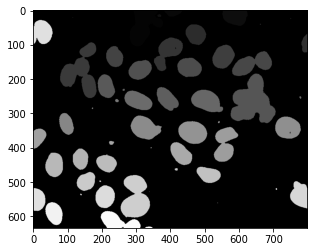

In [19]:
ILabel[ILabel == 7] = 50
plt.imshow(ILabel, cmap='gray')